In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, losses
import matplotlib.pyplot as plt
import numpy as np

C:\Users\Martin\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Martin\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Martin\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Martin\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: P

In [52]:
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.mnist.load_data(path="mnist.npz")
# These two steps below are required to make the output 4D. The first dimension is to enforce the batch size.
# The second and third dimensions are the height and width of the image.
# The fourth dimension is the color scale. 3 = RGB. 1 = Grayscale.
train_x = train_x.reshape([-1,28,28,1])   
test_x = test_x.reshape([-1,28,28,1])  
# Reference: https://stackoverflow.com/questions/41563720/error-when-checking-model-input-expected-convolution2d-input-1-to-have-4-dimens
# Reference 2: https://towardsdatascience.com/understanding-input-and-output-shapes-in-convolution-network-keras-f143923d56ca

In [56]:
# ReferenceL: https://www.tensorflow.org/tutorials/images/cnn
model = models.Sequential()
input_shape = (28, 28, 1)

model.add(layers.Conv2D(28, (3, 3), activation='relu', input_shape=input_shape))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(28, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(28, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [57]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 13, 13, 28)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 11, 11, 28)        7084      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 5, 5, 28)          0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 3, 3, 28)          7084      
_________________________________________________________________
flatten_4 (Flatten)          (None, 252)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 100)             

In [58]:
from keras.callbacks import EarlyStopping

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
history = model.fit(train_x, train_y, epochs=10, validation_data=(test_x, test_y))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 29s 481us/sample - loss: 0.3541 - acc: 0.9180 - val_loss: 0.0805 - val_acc: 0.9761
Epoch 2/10
60000/60000 [==============================] - 26s 441us/sample - loss: 0.0806 - acc: 0.9761 - val_loss: 0.0569 - val_acc: 0.9836
Epoch 3/10
60000/60000 [==============================] - 26s 432us/sample - loss: 0.0570 - acc: 0.9826 - val_loss: 0.0686 - val_acc: 0.9801
Epoch 4/10
60000/60000 [==============================] - 27s 445us/sample - loss: 0.0502 - acc: 0.9845 - val_loss: 0.0799 - val_acc: 0.9779
Epoch 5/10
60000/60000 [==============================] - 28s 462us/sample - loss: 0.0440 - acc: 0.9863 - val_loss: 0.0478 - val_acc: 0.9861
Epoch 6/10
60000/60000 [==============================] - 27s 457us/sample - loss: 0.0388 - acc: 0.9882 - val_loss: 0.0440 - val_acc: 0.9877
Epoch 7/10
60000/60000 [==============================] - 26s 439us/sample - loss: 0.0321 - acc: 0.9900 

10000/10000 [==============================] - 1s 149us/sample - loss: 0.0595 - acc: 0.9853
Training Error: 	0.025937177492425266
Testing Error: 		0.9853
Validation Error: 	0.059535091245701915


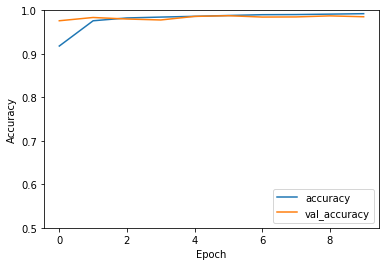

In [59]:
output = model.evaluate(test_x, test_y)

print('Training Error: \t' + str(history.history['loss'][-1]))
print('Testing Error: \t\t' + str(output[-1]))
print('Validation Error: \t' + str(history.history['val_loss'][-1]))

plt.plot(history.history['acc'], label='accuracy')
plt.plot(history.history['val_acc'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')